<a href="https://colab.research.google.com/github/fedorst/dataeng-project/blob/main/kym_vision_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

In [3]:
path = "/content/drive/My Drive/dataEngProject/kym_vision_processed.parquet"

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df = pd.read_parquet(path)

In [6]:
df.head()

,annot_array,error,safeSearch_adult,safeSearch_medical,safeSearch_racy,safeSearch_spoof,safeSearch_violence,url,webDetection_bestGuessLabel
0,"[Cat, Felidae, Carnivore, Small to medium-size...",None,0.00,0.00,0.00,1.00,0.25,https://knowyourmeme.com/memes/this-is-relevan...,interest meme
1,"[Face, Forehead, Nose, Hair, Cheek, Skin, Lip,...",None,0.25,0.25,0.25,0.75,0.25,https://knowyourmeme.com/memes/leave-britney-a...,leave britney alone
2,"[Photograph, Light, Smile, Screenshot, News, F...",None,0.25,0.25,0.00,1.00,0.25,https://knowyourmeme.com/memes/i-like-turtles,like turtles
3,"[Clothing, Hairstyle, Shoulder, Muscle, Neck, ...",None,0.00,0.00,0.25,1.00,0.25,https://knowyourmeme.com/memes/bitches-dont-know,eric harris funny
4,"[Head, Bird, Snowy owl, Eye, Beak, Feather, Ow...",None,0.00,0.25,0.00,1.00,0.50,https://knowyourmeme.com/memes/o-rly,o rly


## cluster annotations, proximity = 1/coincidence

In [14]:
annot_array = df[df["annot_array"].notnull()]["annot_array"]
unique_annots = annot_array.explode().unique()
unique, counts = np.unique(annot_array.explode(), return_counts=True)
zipped_list = list(zip(unique, counts))
unique_count = len(unique)
counts_sum = sum(counts)
threshold = 1000
zipped_list = [x for x in zipped_list if x[1] >= threshold]
zipped_list.sort(key = lambda x: -x[1])
print(f"Total sum of unique annotations' counts: {counts_sum}, total count of unique annotations: {unique_count}")
print(f"After filter with threshold {threshold}, \nTotal sum of unique annotations' counts: {sum(x[1] for x in zipped_list)}, total count of unique annotations: {len(zipped_list)}")
print(zipped_list)

Total sum of unique annotations' counts: 419002, total count of unique annotations: 4722
After filter with threshold 1000, 
Total sum of unique annotations' counts: 231856, total count of unique annotations: 102
[('Font', 10379), ('Art', 7044), ('Happy', 6373), ('Gesture', 6168), ('Event', 5954), ('Graphics', 5937), ('Illustration', 5934), ('Fun', 5411), ('Fictional character', 5389), ('Logo', 4724), ('Electric blue', 3935), ('Drawing', 3634), ('Smile', 3632), ('Photo caption', 3603), ('Animation', 3550), ('Graphic design', 3527), ('Jaw', 3464), ('Brand', 3310), ('Rectangle', 3188), ('Circle', 3064), ('Fiction', 3063), ('Eyewear', 2988), ('Cartoon', 2890), ('Thumb', 2785), ('Pattern', 2780), ('Facial hair', 2702), ('Animated cartoon', 2689), ('T-shirt', 2677), ('Advertising', 2645), ('Visual arts', 2603), ('Magenta', 2537), ('Sleeve', 2389), ('Nose', 2337), ('Eyelash', 2300), ('Recreation', 2139), ('Pleased', 2136), ('Forehead', 2103), ('Clip art', 2073), ('Fashion accessory', 2005), (

In [15]:
np.sum(annot_array.astype(str).str.contains("Font") & annot_array.astype(str).str.contains("Art"))

5543

In [16]:
from itertools import combinations
from scipy.cluster.hierarchy import dendrogram, linkage
distances = []
annot_str = annot_array.astype(str)
for a, b in combinations([x[0] for x in zipped_list], 2):
  print(a,b)
  distances.append(1/(1+np.sum(annot_str.str.contains(a) & annot_str.str.contains(b))))

Voogesituse väljund on kärbitud viimase 5000 reani.
Art Entertainment
Art Darkness
Art Sitting
Art Screenshot
Art Sharing
Art Hat
Art Grass
Art Finger
Art Head
Art Hair
Art Personal protective equipment
Art Flash photography
Art Fur
Art Eye
Art Child
Art Flesh
Art Line art
Art Plant
Art Carmine
Art Tree
Art Laugh
Art Hairstyle
Art Chest
Art Audio equipment
Art Neck
Art Portrait
Art Cheek
Art Sky
Art Ear
Art Symmetry
Art Suit
Art Mammal
Art Human body
Art Vertebrate
Art White-collar worker
Art Organ
Art Elbow
Art Terrestrial animal
Art Signage
Art Poster
Art Monochrome
Art Job
Art Conversation
Art Jewellery
Art Games
Art Cool
Art Tie
Art Landscape
Art Wrinkle
Art Black hair
Happy Gesture
Happy Event
Happy Graphics
Happy Illustration
Happy Fun
Happy Fictional character
Happy Logo
Happy Electric blue
Happy Drawing
Happy Smile
Happy Photo caption
Happy Animation
Happy Graphic design
Happy Jaw
Happy Brand
Happy Rectangle
Happy Circle
Happy Fiction
Happy Eyewear
Happy Cartoon
Happy Thumb
Hap

{'color_list': ['g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'b'],
 'dcoord': [[0.0, 0.0010672358591248667, 0.0010672358591248667, 0.0],
  [0.0, 0.0011409254397813106, 0.0011409254397813106, 0.0010672358591248667],
  [0.0, 0.00135186065407057, 0.00135186065407057, 0.0011409254397813106],
  [0.0, 0.0019707374188593714, 0.0019707374188593714, 0.

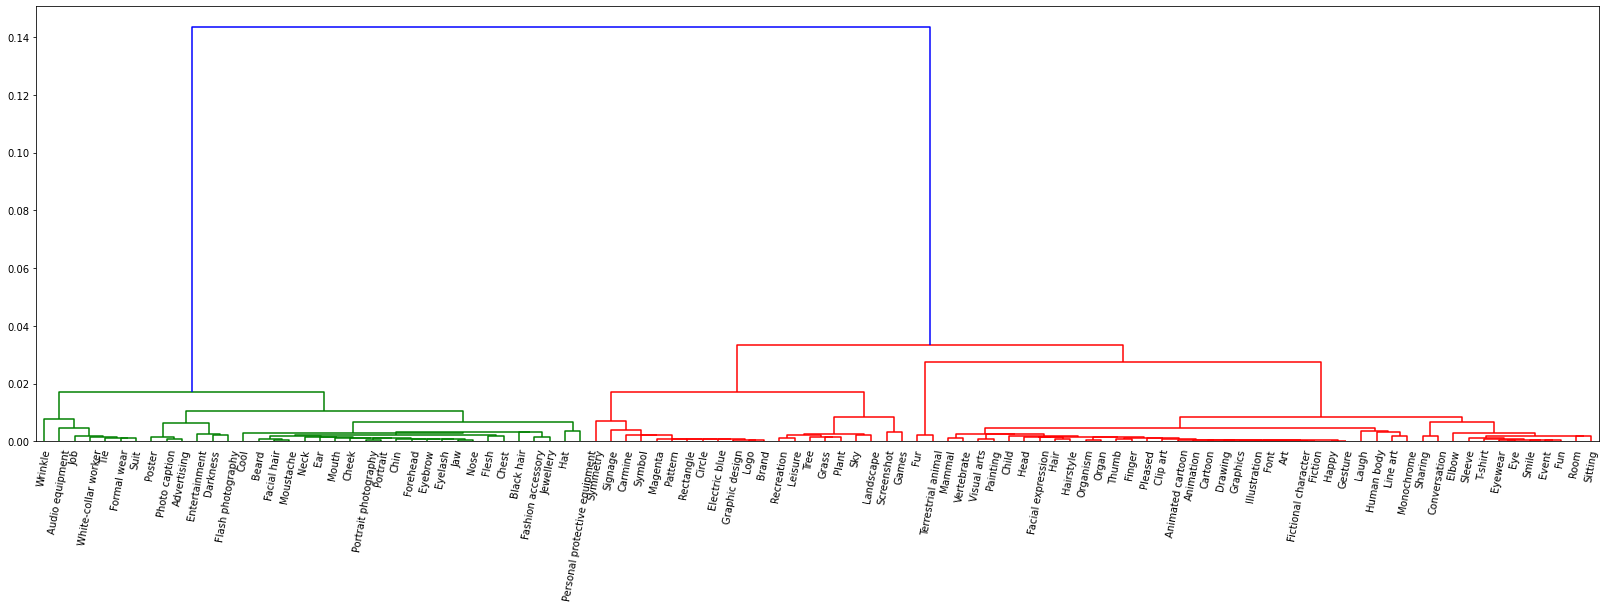

In [19]:
linked = linkage(distances, 'median')
labelList = [x[0] for x in zipped_list]

plt.figure(figsize=(28, 8))
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort=True,
            show_leaf_counts=True,
            leaf_rotation=80,
            leaf_font_size=10)


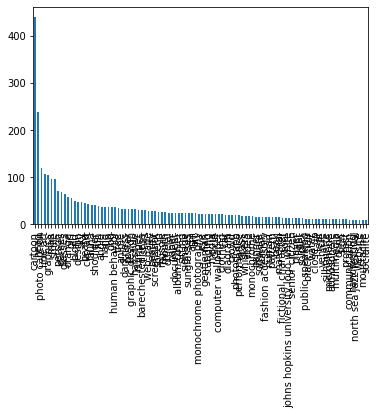

In [ ]:
df.webDetection_bestGuessLabel.value_counts().head(100).plot.bar()

In [ ]:
safeSearchMat = df[[c for c in df.columns if "safeSearch" in c]].corr()

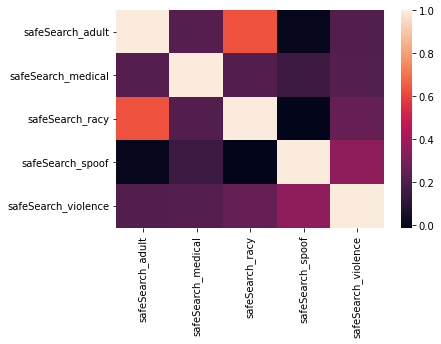

In [ ]:
import seaborn as sns
sns.heatmap(safeSearchMat)
#safeSearch correlations

In [ ]:
df["annot_array"]

0        [Cat, Felidae, Carnivore, Small to medium-size...
1        [Face, Forehead, Nose, Hair, Cheek, Skin, Lip,...
2        [Photograph, Light, Smile, Screenshot, News, F...
3        [Clothing, Hairstyle, Shoulder, Muscle, Neck, ...
4        [Head, Bird, Snowy owl, Eye, Beak, Feather, Ow...
                               ...                        
16681                                                 None
16682                                                 None
16683                                                 None
16684                                                 None
16685                                                 None
Name: annot_array, Length: 16686, dtype: object

In [ ]:
# generate onehot cols based on annot_array
explodedAnnots = df["annot_array"].explode() # .str.get_dummies().sum(level=0).add_prefix('annot_') - is what i would have preferred, but colab crashes
print(explodedAnnots)
dummies = pd.get_dummies(explodedAnnots, prefix="annot_", sparse=True)
print(dummies)

0                               Cat
0                           Felidae
0                         Carnivore
0        Small to medium-sized cats
0                          Whiskers
                    ...            
16681                          None
16682                          None
16683                          None
16684                          None
16685                          None
Name: annot_array, Length: 419117, dtype: object
       annot__3d modeling  ...  annot__Épée
0                       0  ...            0
0                       0  ...            0
0                       0  ...            0
0                       0  ...            0
0                       0  ...            0
...                   ...  ...          ...
16681                   0  ...            0
16682                   0  ...            0
16683                   0  ...            0
16684                   0  ...            0
16685                   0  ...            0

[419117 rows x 4722 column

In [ ]:
dummies.tail()

,annot__3d modeling,annot__3x3 (basketball),annot__800 metres,annot__A-line,annot__Abdomen,annot__Academic certificate,annot__Academic dress,annot__Academic institution,annot__Accessory fruit,annot__Accipitridae,annot__Accipitriformes,annot__Accordion,annot__Accordionist,annot__Acoustic guitar,annot__Acoustic-electric guitar,annot__Acrobatics,annot__Acrylic paint,annot__Acting,annot__Action figure,annot__Action film,annot__Action-adventure game,annot__Active pants,annot__Active shirt,annot__Active shorts,annot__Active tank,annot__Adaptation,annot__Address sign,annot__Adhesive,annot__Admiral,annot__Adventure,annot__Advertising,annot__Aeolian landform,annot__Aerial photography,annot__Aerialist,annot__Aerobatics,annot__Aerospace engineering,annot__Aerospace manufacturer,annot__African elephant,annot__African leopard,annot__Afro,...,annot__freight car,annot__giant pacific octopus,annot__giant white arum lily,annot__goldfinch,annot__grey fox,annot__grey whale,annot__ground squirrels,annot__hawk moths,annot__heater,annot__horse flies,annot__house fly,annot__jean short,annot__kangaroo,annot__lorikeet,annot__meadow jumping mouse,annot__millipedes,annot__octopus,annot__packrats,annot__pear,annot__pipistrelles,annot__robber flies,annot__rubber ducky,annot__rugby short,annot__shortstraw pine,annot__signaling device,annot__stable fly,annot__studio couch,annot__sunflower,annot__sweatpant,annot__trailer truck,annot__trick-or-treat,annot__wasp,annot__water lily,annot__white footed mice,annot__wild cabbage,annot__wild carrot,annot__wood rabbit,annot__yoga pant,annot__À la carte food,annot__Épée
16681,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
16682,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
16683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
16684,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
16685,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
#top_annots = df[[c for c in df.columns if "annot_" in c]].count().sort_values(ascending=False)[:50]
top_annots = dummies.astype(bool).sum().sort_values(ascending=False)[250:350]
selected_columns = top_annots.index 

In [ ]:
top_annots

annot__Purple                    342
annot__Red                       339
annot__Road                      338
annot__Midnight                  338
annot__Goggles                   337
                                ... 
annot__Glove                     223
annot__Dog                       223
annot__Winter                    222
annot__Automotive window part    222
annot__Joint                     222
Length: 100, dtype: int64

In [ ]:
selected_annot_mat = dummies[selected_columns].corr()

In [ ]:
plt.rcParams["figure.figsize"] = (20,20)

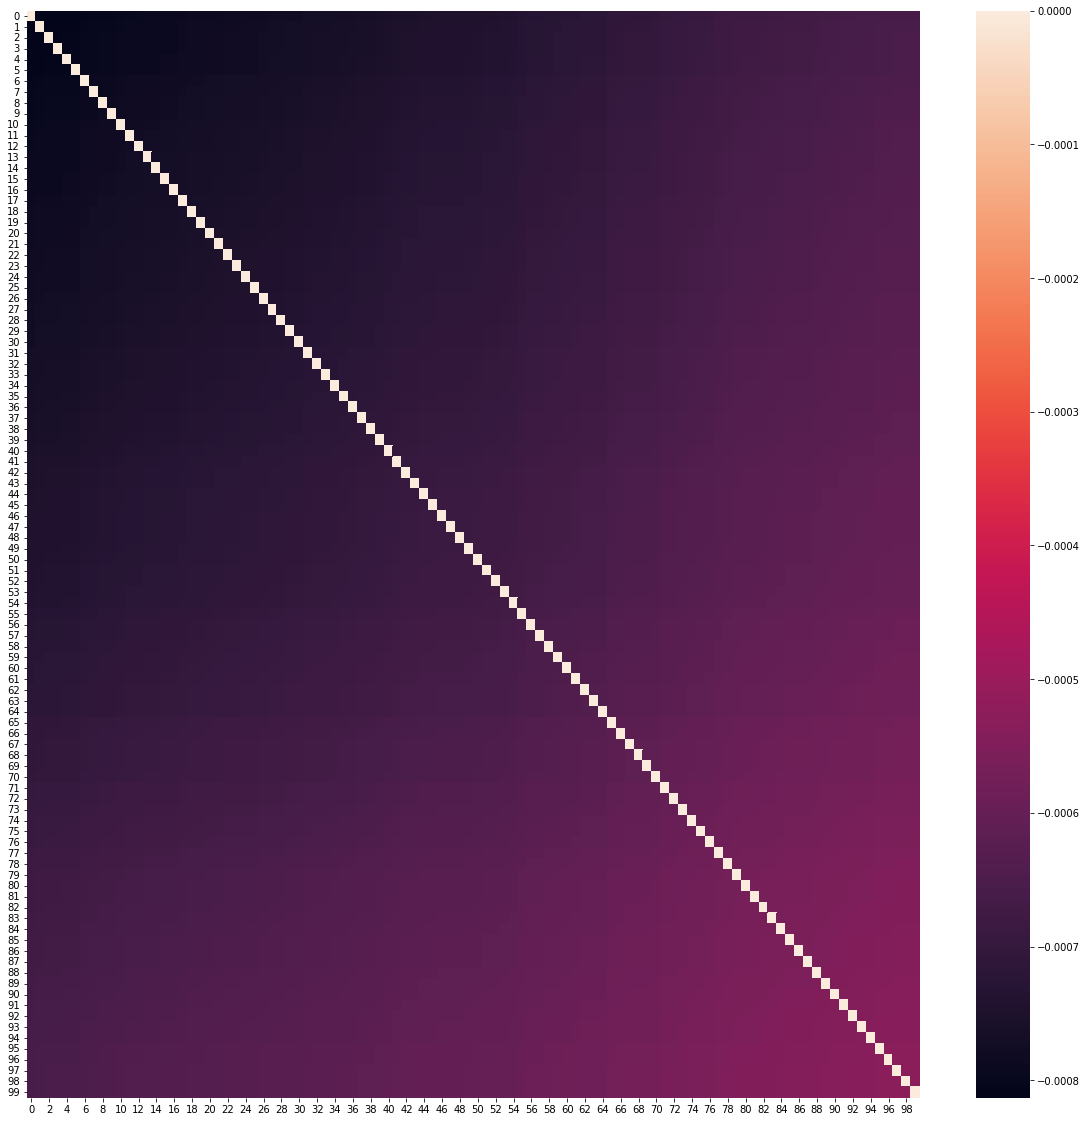

In [ ]:
chartMat = np.array(selected_annot_mat)
np.fill_diagonal(chartMat, np.zeros(chartMat.shape[0]))
sns.heatmap(chartMat)

In [ ]:
selected_annot_mat.sort_values()

TypeError: ignored